JEsli robie prawddpodobienstwo dla regresji logistycznej w takiej wersji to robie gradient ascent  i wtedy z minusem  minimalizacja rgumentu J(w) i wtedy w delcie wagi nie ma znaku -. NIgdy nie zaczynac wag poczatkowych od zera. Zawsze losowac


Dlaczego akurat audot zadania na 5 szczegolniet pytania sa zadawane dot zadania na 5 szczegolnie. Jak najlepiej zakodowac date bo moze duzo dac jej zastosowanie. Na kazdym regionie uczymy modele, sprawdzmay ktory model najwyzsza skutecznosc. Jak beda modele regionalne. Porownac model z dummy classifier. Co z tego porownania wynika. Jesli spodziewalismy sie ten co wygral, to powie o skutecznosci danego modelu. 

# 0. Logistic Regression

Despite its name, it is implemented as a liear model for classification rather than regression. The logistic regression is also known in the literature as **logit regression**, **maximum-entroopy classification (MaxEnt)** or **the log-linear classifier**. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.  In other words: It is a type of linear model used to estimate the probability of a given innput belonging to a specific class.  

It models probabilities using the logistic funnction (sigmoid function) to predit the possible outcomes of a single trial. The logistic regression ensures that the output is always between 0 and 1, making it suitable for probability estimation. 

Types of logistic regression:  
* binary (e.g) spam vs. not spam
* one-vs.-rest (for multi-class problems where each class is compared separately) 
* multinomial (when multiple classes are considered at once)
* elastic-net regularization.  

The numerical output of the logistic regression, which is the predicted probability, can be used as a classifier by applying a treshhold (by default 0.5) to it. This is how it is implemented in scikit-learn, so it expects a categorical target, making the Logistic Regressionn a classifier. 

# 1. Logistic Regression implementation

## 1.1 Gradient descent

$\Delta w$ is derived from the gradient of the corss-entropy loss with respect to the weights.
$$\Delta w_j = -\eta(t_j - y_j)f(x_j^Tw_{j-1})[1-f(x_j^Tw_{j-1})]x_j$$ 
where sigmoid function:   $$f(s)=\frac{1}{1+e^{-\beta s}}$$  in the standard version of logistic regression there is linear output s
$$s = x^Tw + b$$  
but there are another functions to use instead of linear

## 1.2 Cost function and implementation of logistic regression
Log loss also known as logistic loss or cross-entropy loss, the log loss measures the performance of a classification model by penalizing incorrect classifications.  
$$J(\mathbf{w}) = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]$$  
where:  

N is number of samples  
$y_i$ is true label (0 or 1) for the i-th sample  
$\hat{y_i}$ is the predicted probability (output of the sigmoid function) for the i-th sample 

$\log(\hat{y})$ it handles the case when y = 1  
$(1-y)*\log(1 - \hat{y})$ it handles the case when y = 0  

Gradient of Cross-Entropy Loss:
$$\nabla J(\mathbf{w}) = \frac{1}{N} \sum_{i=1}^N (\hat{y}_i - y_i) \mathbf{x}_i$$  
The weights are updated using the gradient descent formula:  
$$\mathbf{w}_{\text{new}} = \mathbf{w}_{\text{old}} - \eta \nabla J(\mathbf{w})$$
where $\eta$ is learning_rate

<img src="Entropia krzyzowa_250504_215152_1.jpg" alt="Entropia 1" width="400"/>
<img src="Entropia krzyzowa_250504_215152_2.jpg" alt="Entropia 2" width="400"/>
<img src="Entropia krzyzowa_250504_215152_3.jpg" alt="Entropia 3" width="400"/>

![Box plot explanation](box_plot.webp)
Q1 is **always** 25th percentile  
Q3 is **always** 75th percentile  
Q2 is 50th percentile (median)

## 1.3 Generating synthetic single-mod datasets

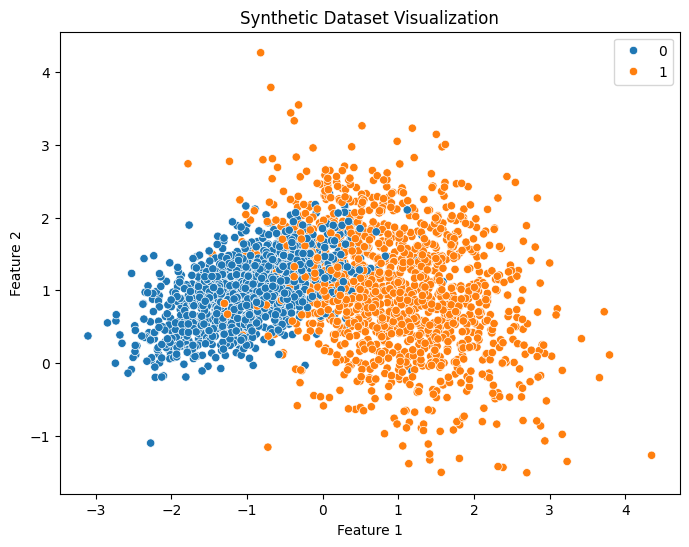

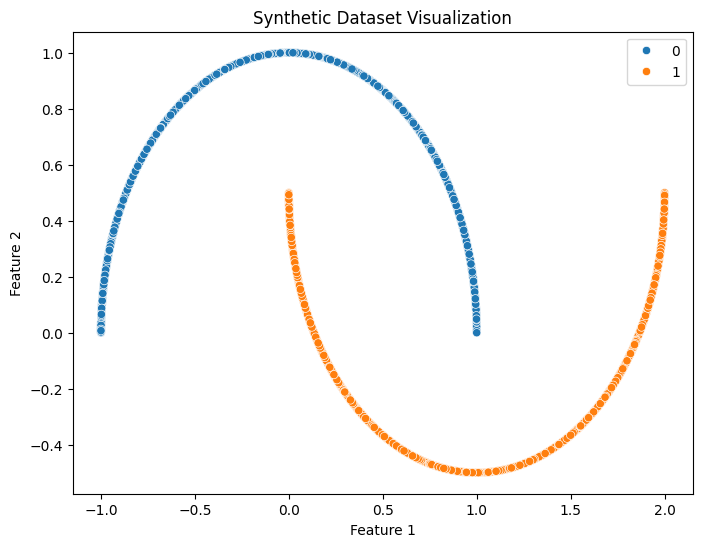

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_curve, auc, f1_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import time


RANDOM_STATE = 254687
N_SAMPLES = 2587
N_FEATURES = 2
N_CLASSES = 2


class SyntheticDataset:
    """A class to generate and preprocess synthetic datasets for classification task."""

    def __init__(self, random_state: int, n_samples: int, n_features: int, n_classes: int):
        """
        Initialize the SyntheticDataset class.

        :param random_state: Seed for random number generation.
        :param n_samples: Number of samples to generate.
        :param n_features: Number of features for the dataset.
        :param n_classess: Number of classes for the target variable.
        """
        self.random_state = random_state
        self.n_samples = n_samples
        self.n_features = n_features
        self.n_classes = n_classes 
        self.X = None
        self.y = None
        self.X_moons = None
        self.y_moons = None


    def generate_make_classification(self) -> tuple[np.ndarray, np.ndarray]:
        """
        Generate a synthetic dataset using make_classification
        
        :return: A tuple containing the feature matrix (X) and target vector (y)
        """
        self.X, self.y = make_classification(
            n_samples=self.n_samples,
            n_features=self.n_features,
            n_informative=self.n_features,
            n_redundant=0,
            n_clusters_per_class=1, # single-mod means one cluster per class
            random_state=self.random_state
        )
        return self.X, self.y
    

    def generate_make_moons(self) -> tuple[np.ndarray, np.ndarray]:
        """
        Generate a synthetic dataset using make_moons

        :return: A tuple containing the feature matrix (X) and target vector (y)
        """
        self.X_moons, self.y_moons = make_moons(
            n_samples=self.n_samples,
            random_state=self.random_state
        )
        return self.X_moons, self.y_moons
    
    
    def visualize_make_classification(self): 
        """ Visualize the dataset using a scatter plot"""
        if self.X is not None and self.y is not None:
            plt.figure(figsize=(8,6))
            sns.scatterplot(x=self.X[:,0], y=self.X[:,1], hue=self.y)
            plt.title("Synthetic Dataset Visualization")
            plt.xlabel("Feature 1")
            plt.ylabel("Feature 2")
            plt.show()
        else:
            print("Dataset not generated yet. Call generate() first.")

    
    def visualize_make_moons(self):
        """ Visualize the dataset using a scatter plot"""
        if self.X_moons is not None and self.y_moons is not None:
            plt.figure(figsize=(8,6))
            sns.scatterplot(x=self.X_moons[:,0], y=self.X_moons[:,1], hue=self.y_moons)
            plt.title("Synthetic Dataset Visualization")
            plt.xlabel("Feature 1")
            plt.ylabel("Feature 2")
            plt.show()
        else:
            print("Dataset not generated yet. Call generate() first.")


    
dataset = SyntheticDataset(RANDOM_STATE, N_SAMPLES, N_FEATURES, N_CLASSES)
X, y = dataset.generate_make_classification() # X is size of (n_samples x n_features) and y is size of (n_samples,) 
dataset.visualize_make_classification()

dataset_moons = SyntheticDataset(RANDOM_STATE, N_SAMPLES, N_FEATURES, N_CLASSES)
X_moons, y_moons = dataset_moons.generate_make_moons()
dataset_moons.visualize_make_moons()

## 1.4 Splitting datasets into training and test sets and normalization

In [103]:
# Dividing dataset on a trening set and test set 
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=RANDOM_STATE) # 80% training set, 20% test set
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(X_moons, y_moons, test_size=0.2, random_state=RANDOM_STATE)

# Normalization of datasets, on training dataset we have to use fit and transform, on test dataset only transform
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)
X_train_moons = min_max_scaler.fit_transform(X_train_moons)
X_test_moons = min_max_scaler.transform(X_test_moons)

### 1.4.1. Own implementation 

In [104]:
class LogisticRegressionOwn:
    """
    Implemantation of logistic regression with gradient descent for binary classification.

    Parameters:
        :learning_rate (float): The learning rate for gradient descent. Default is 0.1
        :iterations (int): The maximum number of iterations for gradient descent. Default is 1000
        :error (float): The error threshold for early stopping. Default is 1e-6.
    """

    def __init__(self, learning_rate: float = 0.1, iterations: int = 1000, error: float = 1e-6):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.error = error
        self.scale_parameter = None # beta in the sigmoid function
        self.weights = None
        self.bias = None
    

    def _sigmoid_function(self, s: np.ndarray, scale_parameter: float = 1.0) -> np.ndarray: 
        """
        Compute the sigmoid function.

        The sigmoid function maps any real-valued number into the range [0,1]
        
        Parameters:
            s (np.ndarray): The input to the sigmoid function. 
            scale_parameter (float): Determines the steepness of the sigmoid curve. Default is 1.0

        Notes:
            scale parameter = beta, it determines how sharply the function transions from 0 to 1
            when scale_param > 1 the function becomes steeper, meaning small changes in input lead to more abrupt probability shifts
            when scale_param = 1, default, standard sigmoid function
            when scale_param (0,1), the function becomes more gradual, resulting is a smoother trasinstion  
        
        Returns:
            np.ndarray: The output fo the sigmoid function.
        """
        self.scale_parameter = scale_parameter
        return 1/(1 + np.exp(-self.scale_parameter * s))
    

    def _cross_entropy_lost_cost_function(self, y: np.ndarray, y_pred: np.ndarray) -> float:
        """
        Compute the cross entropy loss.

        Parameters:
            y (np.ndarray): The true labels.
            y_pred (np.ndarray): The predicted probabilities

        Returns:
            float: The cross-entropy loss

        Notes: 
            We have to avoid situation in which there will be log(0) thats why we adding a small epsilon
        """
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon) # np.clip ensures that all values in the array fall within the given minimum and maximum bounds. 
        # Values below the minimum are set to the minimum, and values above the maximum are set to the maximum
        # syntax np.clip(array, min_value, max_value)
        return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))


    def fit(self, X: np.ndarray, y: np.ndarray):
        """
        Train the logistic regression model using gradient descent.

        Parameters:
            X (np.ndarray): the feature matrix of shape (n_samples, n_features)
            y (np.ndarray): The target vector of shape (n_samples, )
        """

        if X.shape[0] != y.shape[0]:
            raise ValueError("X and y must have the same number of samples")
        
        # Initialize weights and bias but not as a zeros, standard normal distribution 
        self.weights = np.random.randn(X.shape[1]) * 0.01 # Scale by 0.01 to keep values small
        self.bias = np.random.randn() * 0.01 


        # Starting timer
        start_time = time.time()

        # Counting 100 iterations 
        for _ in range(100):

            # Gradient descent
            for i in range(self.iterations):
            
                # Computing linear output
                linear_output = np.dot(X, self.weights) + self.bias

                # Computing sigmoid 
                sigmoid_output = self._sigmoid_function(linear_output) # sigmoid output is also 'y_pred' 

                # Computing derivatve
                sigmoid_derivative = sigmoid_output * (1 - sigmoid_output)
                
                # Compute error and gradient
                error = (sigmoid_output - y) 
                gradient = np.dot(X.T, error * sigmoid_derivative) / len(X)
                delta_w = -self.learning_rate * gradient
                self.weights += delta_w
                delta_b = -self.learning_rate * np.mean(error)
                self.bias += delta_b

                # Compute cost
                cost = self._cross_entropy_lost_cost_function(y, sigmoid_output)
                
                # Early stopping
                if abs(cost) < self.error:
                    print(f"Stopping early at iteration {i} because cost: {cost} is smaller than error threshold {self.error}")
                    break
        
        # End time counter
        end_time = time.time() 
        self.training_time = end_time - start_time # Store training time
        print(f"Training completed in {self.training_time:.4f} seconds.")


    def predict_binary_output(self, X: np.ndarray) -> np.ndarray:
        """
        Predict binary labels for the input data/

        Parameters:
            X (np.ndarray): The feature matrix of shape (n_samples. n_features).

        Returns:
            np.ndarray: The predicted binary labels of shape (n_samples,)
        """
        # Compute the linear combination of inputs and weights
        linear_output = np.dot(X, self.weights) + self.bias

        # Apply the sigmoid function to get probabilites 
        y_pred = self._sigmoid_function(linear_output)
        return (y_pred >= 0.5).astype(int) # Convert probabilities to binary predictions 
    
    
    def predict_probability_output(self, X: np.ndarray) -> np.ndarray:
        """
        Predict probabilities for the input data.

        Parameters:
            X (np.ndarray): The feature matrix of shape (n_samples, n_features)
    
        Returns:
            np.ndarray: The predicted probabilities of shape (n_samples,)
        """
        linear_output = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid_function(linear_output)
        return y_pred

### 1.4.2. Fitting models 

In [105]:
# Fitting model on make_classification dataset
logistic_regression_solver = LogisticRegressionOwn()
logistic_regression_solver.fit(X_train, y_train)
y_pred = logistic_regression_solver.predict_binary_output(X_test)
y_pred_probability = logistic_regression_solver.predict_probability_output(X_test)

# Fitting model on make_moons dataset
logistic_regression_solver_moons = LogisticRegressionOwn()
logistic_regression_solver_moons.fit(X_train_moons, y_train_moons)
y_pred_moons = logistic_regression_solver_moons.predict_binary_output(X_test_moons)
y_pred_probability_moons = logistic_regression_solver_moons.predict_probability_output(X_test_moons)

Training completed in 8.9611 seconds.
Training completed in 9.5842 seconds.


# 1.5. Defining class for analyzing results 

In [106]:
class ResultsAnalyzes:
    """ 
    A class to analyze and visualize the results of a binary classification model.

    Parameters:
        target (np.ndarray): The true labels.
        prediction (np.ndarray): The predicted labels.
    """

    def __init__(self, target: np.ndarray, prediction: np.ndarray):
        self.target = target
        self.prediction = prediction
        self._accuracy = None # Private atribute
        self._sensitivity = None
        self._specificity = None
        self._precision = None
        self._false_match_rate = None
        self._false_non_match_rate = None

    def confusion_matrix(self):
        """ Compute and plot the confusion matrix """
        cm = confusion_matrix(self.target, self.prediction)

        # Plot the confusion matrix using Seaborn
        plt.figure(figsize=(6,4))
        sns.heatmap(
            cm, 
            annot=True, # Displays the value in each cell
            fmt="d", # Format the values as integers
            cmap="Blues", # uses a blue color palette 
            cbar=False, # Hide the color bar
            xticklabels=["Predcited 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"]
        )
        
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title("Confusion matrix")
        plt.show()

    @property 
    def accuracy(self) -> float:
        """ 
        Compute the accuracy of the predictions.
        
        Notes:
            Tells how many samples were well classified from all samples
        """
        return accuracy_score(self.target, self.prediction) 

    @property
    def sensitivity(self) -> float: 
        """ 
        Compute the sensivitty (recall) of the predictions. Sensitivity (Recall) = TP / (TP + FN) 
        
        Notes:
            Tell how many samples were predicted as True Positive from all Acutal Positive
        """
        
        return recall_score(self.target, self.prediction)

    @property
    def specificity(self) -> float: 
        """
        Compute the specificity of the predictions.  Specificity = TN / (TN + FP)

        Notes:
            Tell how many samples were predicted as True Negatives from all Acutal Negative
        """
        
        cm = confusion_matrix(self.target, self.prediction)
        self.tn, self.fp, self.fn, self.tp = cm.ravel() # ravel function in numpy is used to faltten a multi-dimensional array into a 1-dimensional array. It returns a contiguous flattened array, meaning it 
        # collapses the array into a single dimension while maintaining the order of the elements 
        specificity = self.tn / (self.tn + self.fp)
        return specificity
    
    @property
    def balanced_accuracy(self) -> float:
        """
        Compute class imbalance by giving equal weight to both classes.

        Notes:  
         Useful when:
        - Model detects one class better than the other
        - Dataset has unequal class distribution

        !!!! high BA doesn't reveal if the model beats majority-class guessing
        example: in a 90% majority classs, BA = 0.9 could mean the model just predicts the majority that's why we need J score

        **Interpretation:**  
        - 1 = Perfect classifier  
        - 0.5 = Random guessing  
        
        """
        return (self.sensitivity + self.specificity) / 2
    
    @property
    def j_score(self) -> float:
        """
        Measures how much better the model is than random chance. Penalizes models that rely on class imbalance. 

        Notes:
        baseline = 0 means no better than guessing
        J = 0.6 means the model is 60% better than random
        J = -1 means always wrong
        J = 1 means perfect
        """
        return self.sensitivity + self.specificity - 1
    

    @property
    def f1_score(self) -> float:
        """
        Is a critical metric for evaluating classification models, especially when dealing with imbalanced datasets. 
        Penalizes models that ignore the minority class
        Use case: 
        Ideal for fraud detecion, disease screening:
        * In fraud detection: it answers: "Are we catching enough fraud without overwhelming our team?
        * In disease screening "Are we diagnosing patients early without causing unnecessary panic?
        """
        return f1_score(self.target, self.prediction)
    

    @property
    def false_match_rate(self) -> float:
        """
        This metric is critical in biometric systems (e.g., fingerprint, face recognition) and security applications. 
        Mistaking an impostor for a legitimate user.
        
        Notes:
        Lower FMR → Stricter system (fewer impostors accepted, but more legitimate users rejected).
        A bank vault prioritizes low FMR (avoid impostors) → High FNMR is tolerated (owners may retry).
        """
        return self.fp / (self.fp + self.tn)
    

    @property
    def false_non_match_rate(self) -> float:
        """
        This metric is critical in biometric systems (e.g., fingerprint, face recognition) and security applications. 
        Mistaking a legitimate user for an impostor. \
        
        Notes:
        A office door prioritizes low FNMR (avoid frustrating employees) → Higher FMR risk.       
        """
        return self.fn / (self.fn + self.tp)
    

    def show_results(self):
        """ Display the accuracy, sensitivity and specificity of the predictions"""
        #self.accuracy = self._accuracy()
        #self.sensitivity = self._sensitivity()
        #self.specificity = self._specificity()
        print(f"Accuracy: {self.accuracy:.2f}, Sensivity: {self.sensitivity:.2f}, Specifity: {self.specificity:.2f}")

    
    def plot_ROC_curve(self, y_prediction_probability: np.ndarray):
        """
        Plot the Receiver Operaint Characteristic (ROC) curve.
        
        Parameters:
            y_prediction_probability (np.ndarray): The predicted probabilities for the positive class.
        """
        # Compute ORC curve and AUC
        fpr, tpr, thresholds = roc_curve(self.target, y_prediction_probability) # stands for False Positive Rate (1 - Specificity)  and True Positive Rate (Sensitivity)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure(figsize=(8,6))
        plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC cruve (AUC = {roc_auc:.2f})")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("Receiver Operating Characterstics Curve")
        plt.legend(loc="lower right")
        plt.show()

        def plot_decision_boundary(self, X: np.ndarray, y: np.ndarray):
            """
            Plot the decision boundary for a trained model.
            
            Parameters:
                X (np.ndarray): The feature matrix of shape (n_samples,n_features)
                y (np.ndarray): The target vector of shape (n_samples,).
            """

            if X.shape[1] != 2:
                raise ValueError("Decision boundary plotting is only supported for 2D feature spaces.")
            
            # Create a grid of points covering the feature space
            x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1 # Frist feature
            y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1 # Second feature

## 1.5.1. Results for make_classification dataset

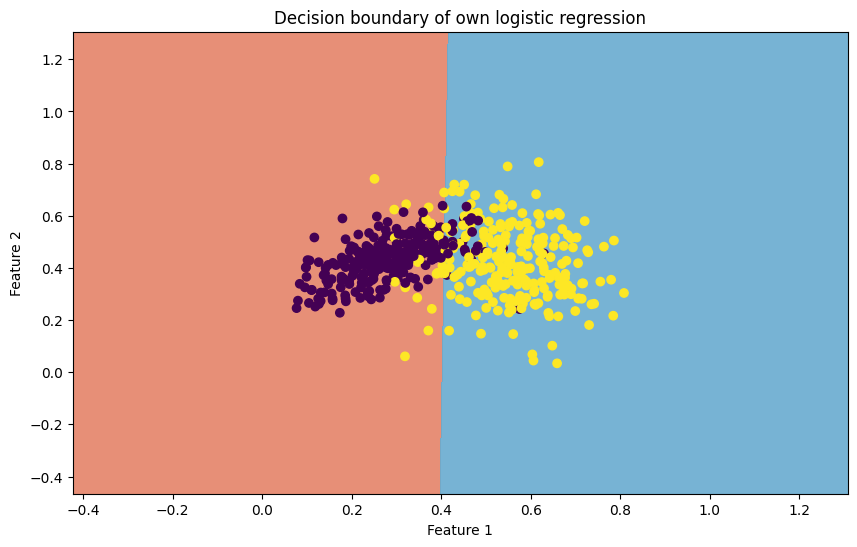

Accuracy: 0.90, Sensivity: 0.90, Specifity: 0.90


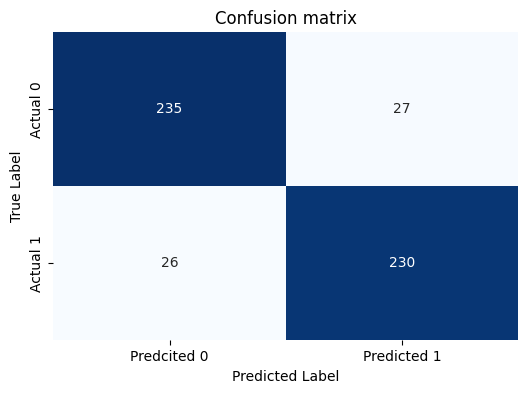

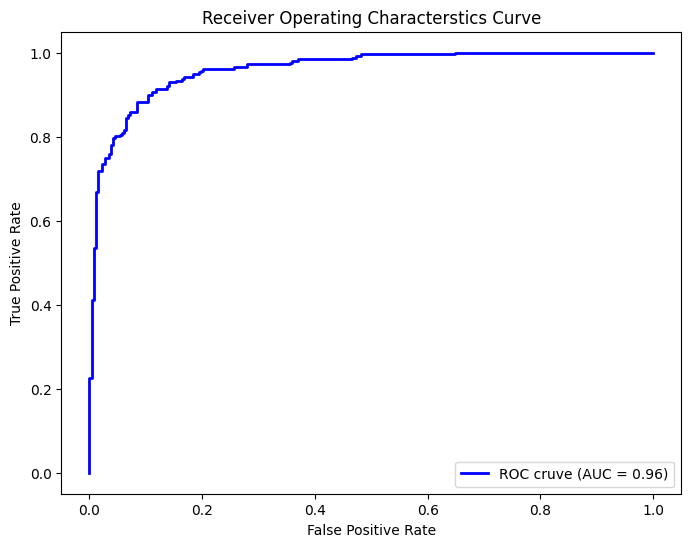

In [107]:
# Create a meshgrid for visualization
x_min, x_max = X_test[:,0].min() - 0.5, X_test[:,0].max() + 0.5
y_min, y_max = X_test[:,1].min() - 0.5, X_test[:,1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict probabilities for the meshgrid
Z = logistic_regression_solver.predict_probability_output(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.9, cmap=plt.cm.RdBu, levels=[0, 0.5, 1])
# levels defines the boudnaries between colored regions: one region for class 0 where predicted probbability P(y=1) < 0.5, one for class 1
# where predicted probbability P(y=1) > 0.5 
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision boundary of own logistic regression")
plt.show()

results = ResultsAnalyzes(y_test, y_pred)
results.show_results()

results.confusion_matrix()
results.plot_ROC_curve(y_pred_probability)

## 1.5.2. Results for make_moons dataset

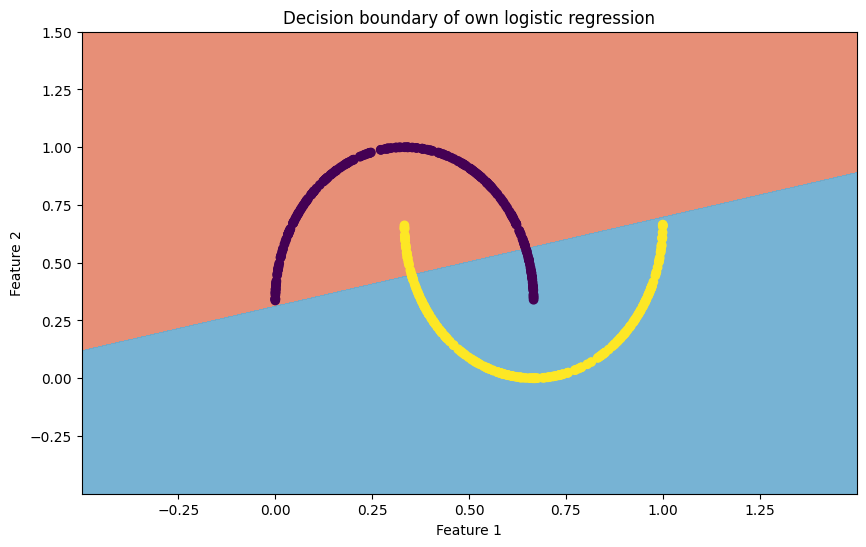

Accuracy: 0.89, Sensivity: 0.90, Specifity: 0.88


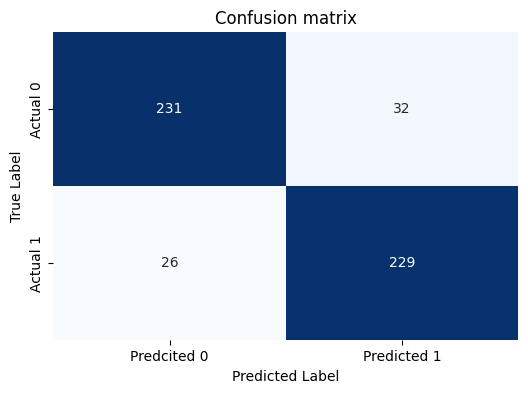

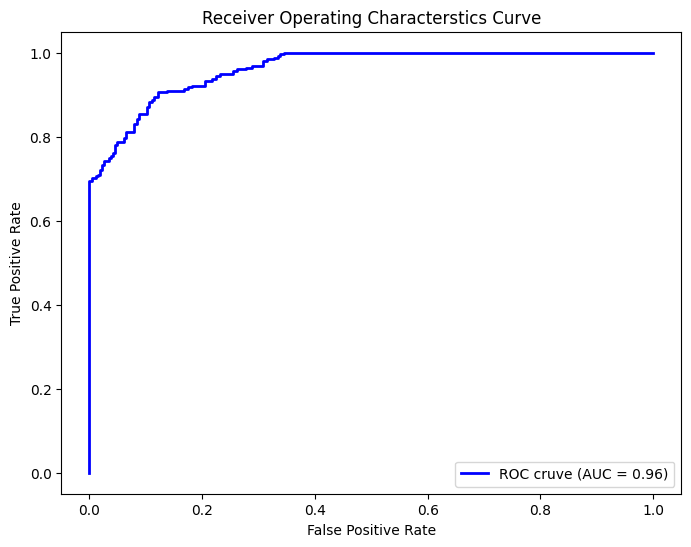

In [108]:
# Create a meshgrid for visualization
x_min, x_max = X_test_moons[:,0].min() - 0.5, X_test_moons[:,0].max() + 0.5
y_min, y_max = X_test_moons[:,1].min() - 0.5, X_test_moons[:,1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict probabilities for the meshgrid
Z = logistic_regression_solver_moons.predict_probability_output(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.9, cmap=plt.cm.RdBu, levels=[0, 0.5, 1])
# levels defines the boudnaries between colored regions: one region for class 0 where predicted probbability P(y=1) < 0.5, one for class 1
# where predicted probbability P(y=1) > 0.5 
plt.scatter(X_test_moons[:,0], X_test_moons[:,1], c=y_test_moons)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision boundary of own logistic regression")
plt.show()

results_moons = ResultsAnalyzes(y_test_moons, y_pred_moons)
results_moons.show_results()

results_moons.confusion_matrix()
results_moons.plot_ROC_curve(y_pred_probability_moons)

# 1.6. Model from sklearn  

## 1.6.1. Make classification dataset

Prediction completed in 0.0105 seconds.


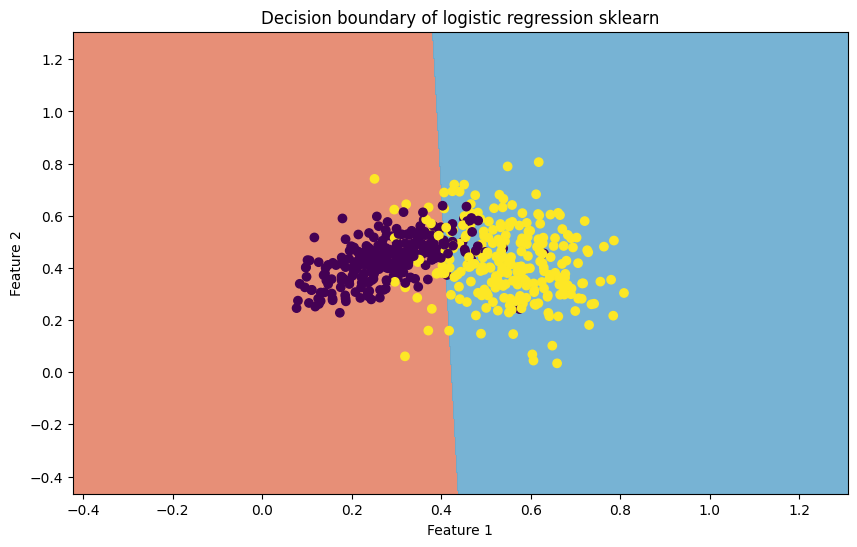

Accuracy: 0.89, Sensivity: 0.89, Specifity: 0.89


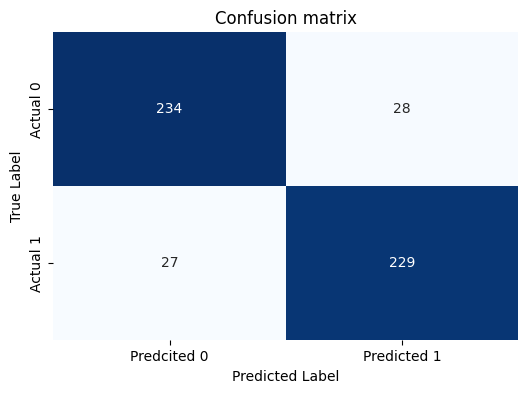

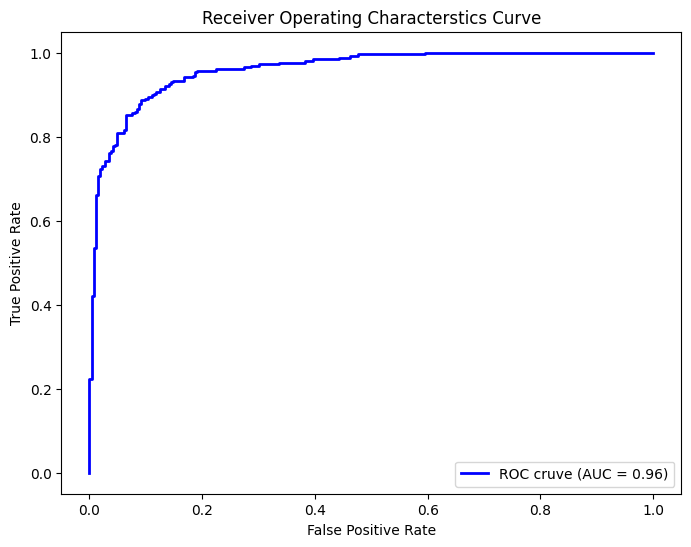

In [109]:
# Initialization of logistic regression solver from sklearn, setting max iterations and tolerance
logistic_regression_sklearn_solver = LogisticRegression(max_iter=logistic_regression_solver.iterations, tol=logistic_regression_solver.error)
logistic_regression_sklearn_solver.fit(X_train, y_train)

# Computing time
start_time = time.time() # Start time
for _ in range(100):
    # Making predictions 
    sklearn_pred = logistic_regression_sklearn_solver.predict(X_test)
end_time = time.time() # End time
time_complexity = end_time - start_time
print(f"Prediction completed in {time_complexity:.4f} seconds.")

sklearn_pred_probability = logistic_regression_sklearn_solver.predict_proba(X_test)[:,1] # Probability that sample belongs to class: "1",w hen we talk about binary classes

# Create a meshgrid for visualization
x_min, x_max = X_test[:,0].min() - 0.5, X_test[:,0].max() + 0.5
y_min, y_max = X_test[:,1].min() - 0.5, X_test[:,1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict probabilities for the meshgrid
Z = logistic_regression_sklearn_solver.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.9, cmap=plt.cm.RdBu, levels=[0, 0.5, 1])
# levels defines the boudnaries between colored regions: one region for class 0 where predicted probbability P(y=1) < 0.5, one for class 1
# where predicted probbability P(y=1) > 0.5 
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision boundary of logistic regression sklearn")
plt.show()

results_sklearn = ResultsAnalyzes(y_test, sklearn_pred)
results_sklearn.show_results()
results_sklearn.confusion_matrix()
results_sklearn.plot_ROC_curve(sklearn_pred_probability)

## 1.6.2. Make moons dataset

Prediction completed in 0.0097 seconds.


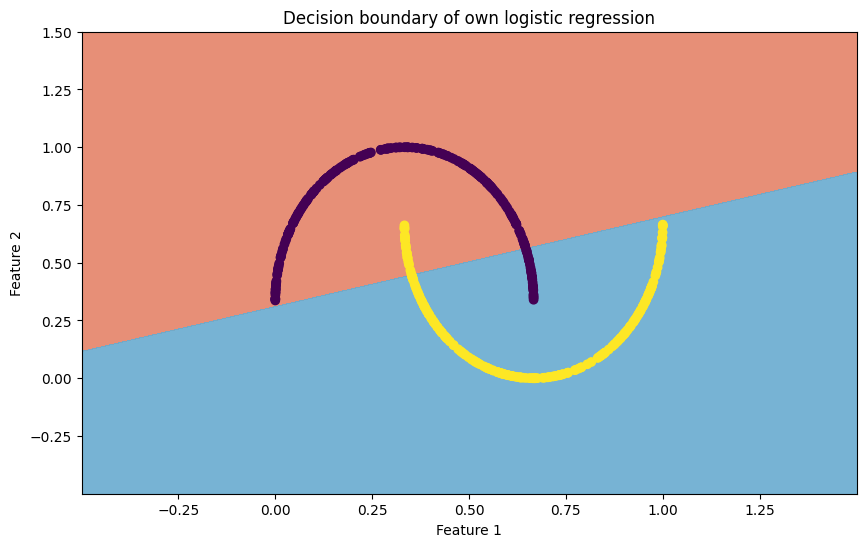

Accuracy: 0.89, Sensivity: 0.90, Specifity: 0.88


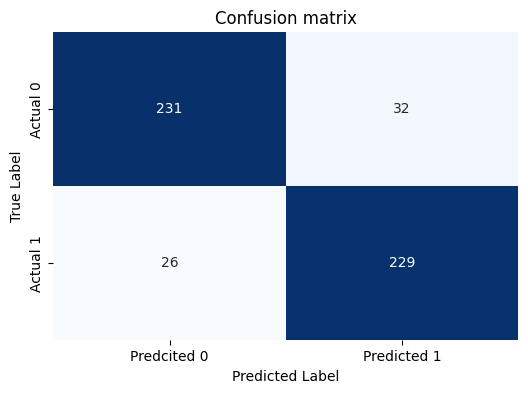

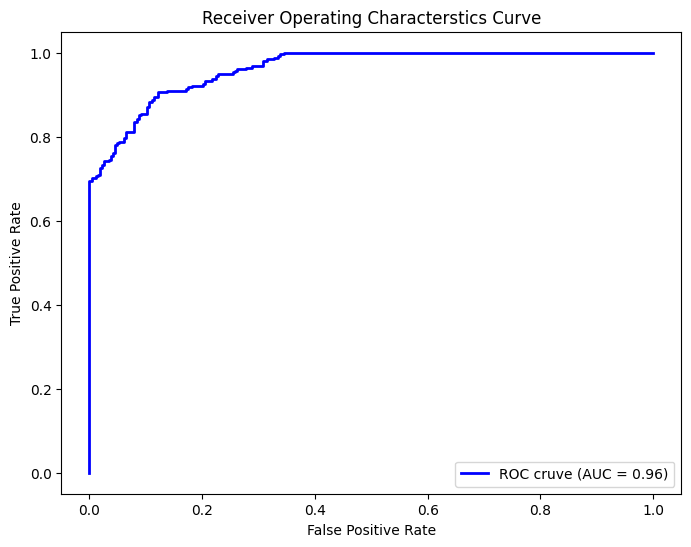

In [110]:
# Initializing the instance of logistic regression class from sklearn, taking into consideration max number of iterations and error
logistic_regression_sklearn_solver_moons = LogisticRegression(
    max_iter=logistic_regression_solver_moons.iterations,
    tol=logistic_regression_solver_moons.error
    )

logistic_regression_sklearn_solver_moons.fit(X_train_moons, y_train_moons)

# Computing time 
start_time = time.time() # Start time
for _ in range(100):
    # Making predictions
    sklearn_pred = logistic_regression_sklearn_solver_moons.predict(X_test_moons)
end_time = time.time() # End time
time_complexity = end_time - start_time
print(f"Prediction completed in {time_complexity:.4f} seconds.")



sklearn_pred_probability = logistic_regression_sklearn_solver_moons.predict_proba(X_test_moons)[:,1] # Probability that sample belongs to class: "1",w hen we talk about binary classes

# Create a meshgrid for visualization
x_min, x_max = X_test_moons[:,0].min() - 0.5, X_test_moons[:,0].max() + 0.5
y_min, y_max = X_test_moons[:,1].min() - 0.5, X_test_moons[:,1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict probabilities for the meshgrid
Z = logistic_regression_sklearn_solver_moons.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.9, cmap=plt.cm.RdBu, levels=[0, 0.5, 1])
# levels defines the boudnaries between colored regions: one region for class 0 where predicted probbability P(y=1) < 0.5, one for class 1
# where predicted probbability P(y=1) > 0.5 
plt.scatter(X_test_moons[:,0], X_test_moons[:,1], c=y_test_moons)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision boundary of own logistic regression")
plt.show()

results_sklearn = ResultsAnalyzes(y_test_moons, sklearn_pred)
results_sklearn.show_results()
results_sklearn.confusion_matrix()
results_sklearn.plot_ROC_curve(sklearn_pred_probability)

# 2. Rain in Australia
## 2.1. Preprocessing of the dataset

Pay attention to count mode and median only on train dataset to avoid data leackage 

### 2.1.1. Import libraries and dataset

In [111]:
import pandas as pd
from IPython.display import clear_output
from scipy.stats.mstats import winsorize
import seaborn as sns


df = pd.read_csv('weatherAUS.csv')
print(df.head)

<bound method NDFrame.head of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W  

### 2.1.2. Counting missing values

In [112]:
# Counting missing values
for column in df.columns:
    number_of_missing_values = df[column].isna().mean() * 100 
    print(f"Column {column} has a {number_of_missing_values:.2f}% of missing values")

Column Date has a 0.00% of missing values
Column Location has a 0.00% of missing values
Column MinTemp has a 1.02% of missing values
Column MaxTemp has a 0.87% of missing values
Column Rainfall has a 2.24% of missing values
Column Evaporation has a 43.17% of missing values
Column Sunshine has a 48.01% of missing values
Column WindGustDir has a 7.10% of missing values
Column WindGustSpeed has a 7.06% of missing values
Column WindDir9am has a 7.26% of missing values
Column WindDir3pm has a 2.91% of missing values
Column WindSpeed9am has a 1.21% of missing values
Column WindSpeed3pm has a 2.11% of missing values
Column Humidity9am has a 1.82% of missing values
Column Humidity3pm has a 3.10% of missing values
Column Pressure9am has a 10.36% of missing values
Column Pressure3pm has a 10.33% of missing values
Column Cloud9am has a 38.42% of missing values
Column Cloud3pm has a 40.81% of missing values
Column Temp9am has a 1.21% of missing values
Column Temp3pm has a 2.48% of missing values
C

### 2.1.3. Deleting columns and samples without labels

In [113]:
# Deleting columns which have more than 30 % of NaN
df.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], inplace=True)

# Deleting samples which have no label
df.dropna(subset=['RainTomorrow'], inplace=True)  
print(df)

# clear_output() # This command clears output for current cell

              Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  \
0       2008-12-01   Albury     13.4     22.9       0.6           W   
1       2008-12-02   Albury      7.4     25.1       0.0         WNW   
2       2008-12-03   Albury     12.9     25.7       0.0         WSW   
3       2008-12-04   Albury      9.2     28.0       0.0          NE   
4       2008-12-05   Albury     17.5     32.3       1.0           W   
...            ...      ...      ...      ...       ...         ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0           E   
145455  2017-06-21    Uluru      2.8     23.4       0.0           E   
145456  2017-06-22    Uluru      3.6     25.3       0.0         NNW   
145457  2017-06-23    Uluru      5.4     26.9       0.0           N   
145458  2017-06-24    Uluru      7.8     27.0       0.0          SE   

        WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0                44.0          W        WNW          20.0          24.0 

### 2.1.4. Defining features

In [114]:
# Define fatures
categorical_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
numerical_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

# Conversion for format datetime
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year 
df['Month'] = df['Date'].dt.month
seasons = {1: "Summer", 2: "Summer", 3: "Autumn", 4: "Autumn", 5: "Autumn", 6: "Winter", 7: "Winter", 8: "Winter", 9: "Spring", 10: "Spring", 11: "Spring", 12: "Summer"}
df['Seasons'] = df['Month'].map(seasons)
categorical_features.append('Seasons')

# After maping for seasons I don't need month and year and Date anymore
df.drop(columns=['Date', 'Year', 'Month'], inplace=True)

### 2.1.5. Separating column of label

In [115]:
# Separating label 
X = df.drop('RainTomorrow', axis=1) # axis=0 will drop a row, when axis=1 it drops a column
y = df['RainTomorrow']
y = y.map({'No': 0, 'Yes': 1}) 

### 2.1.6 Before winsorizing

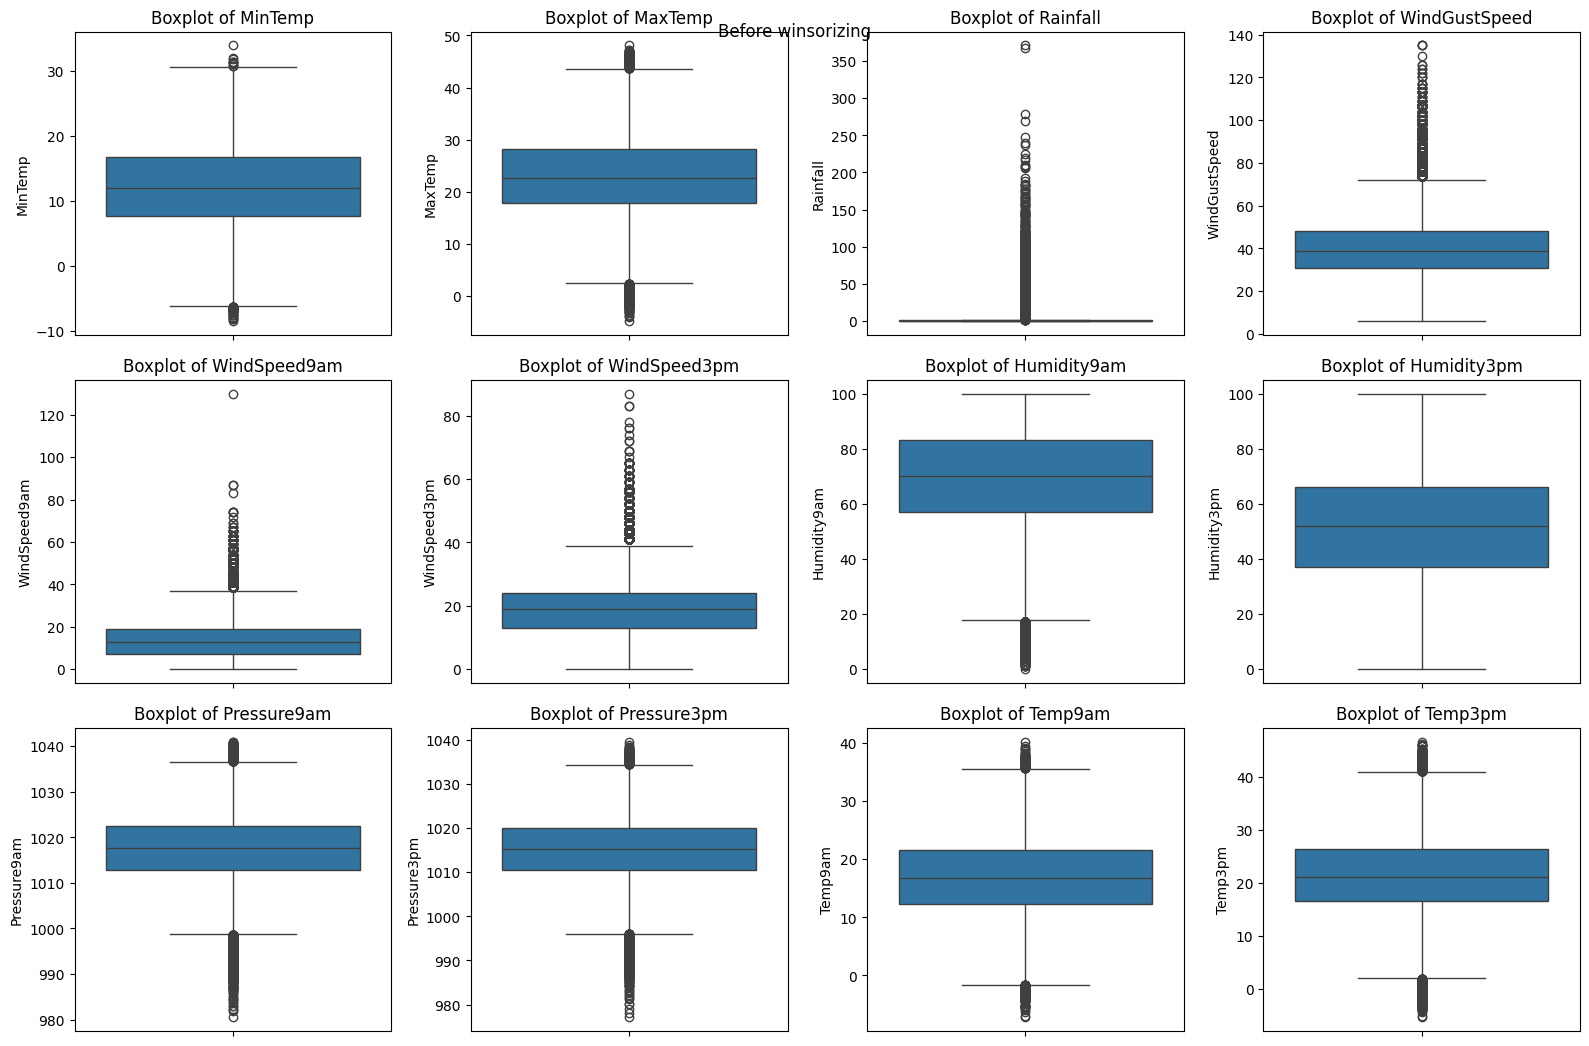

In [116]:
# Creating box plots foe each numerical features
plt.figure(figsize=(16,14))

for i, feature in enumerate(numerical_features, 1): # syntax enumerate(iterable, starting index)
    plt.subplot(4, 4, i) # Adjust grid size based on number of features
    sns.boxplot(y=X[feature])
    plt.title(f"Boxplot of {feature}")
    plt.tight_layout()
plt.suptitle("Before winsorizing")
plt.show()

### 2.1.7. Spliting into training and test sets based on location

In [117]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# I am searching for unique values in location
regions = X['Location'].unique()

# Creating dictioniary to store split datasets
region_data = {}

# Creating variable to store the best accuracy score
best_accuracy_score = 0

# Creating variable to store the best region
best_region = None

# Global mode for categorical features, used for imputation only when feature for region in NaN
global_categorical_imputers = {feature: X[feature].mode()[0] for feature in categorical_features}

# Global median fo numerical features, used for imputation only when feature for region is NaN
global_numerical_imputers = {feature: X[feature].median() for feature in numerical_features}

for region in regions:
    # Filter data for current region
    region_indices = X[X['Location'] == region].index

    X_region = X.loc[region_indices].copy()
    y_region = y.loc[region_indices].copy()

    # Startification will assure that both train and test sets will have the same proportion of 'Rain' vs 'No rain' as the original data
    # It is important when target is imbalanced .e.g., only 20% rainy days
    # Stratify does NOT balance the classes
    # Stratify does NOT equalize the number of samples between classes.
    # Stratify does NOT reduce the dataset size to match the smallest class.
    # Stratify ENSURES that the class distribution in the target variable y is preserven in both the traing and test sets.

    # Train-test split with stratification    
    X_train, X_test, y_train, y_test = train_test_split(X_region, y_region, test_size=0.2, random_state=RANDOM_STATE, stratify=y_region)

    # Computing mode for categorical features
    categorical_imputers = {}

    for feature in categorical_features:
        mode_series = X_train[feature].mode()
        if not mode_series.empty:
            categorical_imputers[feature] = mode_series[0]
        else:
            categorical_imputers[feature] = global_categorical_imputers[feature]

    # Comuting median fro numerical features
    numerical_imputers = {}
    for feature in numerical_features:
        median_value = X_train[feature].median()
        if not np.isnan(median_value):
            numerical_imputers[feature] = median_value
        else:
            numerical_imputers[feature] = global_numerical_imputers[feature]

    # numerical_imputers = {feature: X_train[feature].median() for feature in numerical_features}

    # Impute missing values in both training and test sets

    # If I pass a dict to fillna it interpeting keys from a dict as a column name
    # When I pass a dictionary to fillna(), Pandas interprets the keys as column names 
    # and uses the corresponding values to fill missing data in those columns.

    # For categorical features
    X_train[categorical_features] = X_train[categorical_features].fillna(categorical_imputers)
    X_test[categorical_features] = X_test[categorical_features].fillna(categorical_imputers)

    # For numerical features
    X_train[numerical_features] = X_train[numerical_features].fillna(numerical_imputers)
    X_test[numerical_features] = X_test[numerical_features].fillna(numerical_imputers)
        
    # Winsorizing features, remember to apply bounds from training set on test set
    for feature in numerical_features:
        Q1 = X_train[feature].quantile(0.25)
        Q3 = X_train[feature].quantile(0.75)
        IQR = Q3 - Q1 
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        X_train[feature] = X_train[feature].clip(lower=lower_bound, upper=upper_bound)
        X_test[feature] = X_test[feature].clip(lower=lower_bound, upper=upper_bound)

    # Normalize numerical features
    normalizer = MinMaxScaler()
    X_train[numerical_features] = normalizer.fit_transform(X_train[numerical_features])
    X_test[numerical_features] = normalizer.transform(X_test[numerical_features])

    # Initialize encoder
    # Dropping first to avoid multicollinearity
    encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
    
    # Fit on training data
    X_train_encoded = encoder.fit_transform(X_train[categorical_features])
    X_test_encoded = encoder.transform(X_test[categorical_features])

    # Convert to DataFrame
    encoded_cols = encoder.get_feature_names_out(categorical_features)
    X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_cols, index=X_train.index)
    X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_cols, index=X_test.index)

    # Combine with original data
    X_train = pd.concat([X_train.drop(categorical_features, axis=1), X_train_encoded], axis=1)
    X_test = pd.concat([X_test.drop(categorical_features, axis=1), X_test_encoded], axis=1)

    # Creating a logistic regression solver
    logistic_regression_solver_sklearn = LogisticRegression(max_iter=logistic_regression_solver.iterations, tol=logistic_regression_solver.error)
    logistic_regression_solver_sklearn.fit(X_train, y_train)
    
    # Making predicitions
    y_pred = logistic_regression_solver_sklearn.predict(X_test)

    # Probability for ROC curve
    y_pred_prob = logistic_regression_solver_sklearn.predict_proba(X_test)[:,1] # Probability that sample belong to class "1"

    # Store in dictioniary
    region_data[region] = {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
        'y_pred': y_pred,
        'y_pred_prob': y_pred_prob
    }
    
    # Using accuracy score as a metric to compare models, because stratification will assure that both traina and test sets will have the
    # same proportion of 'Rain' vs 'No rain' as the original data 
    region_accuracy_score = accuracy_score(y_test, y_pred)

    if region_accuracy_score > best_accuracy_score:
        best_accuracy_score = region_accuracy_score
        best_region = region  

d:\python 3.13.1\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\python 3.13.1\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\python 3.13.1\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\python 3.13.1\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\python 3.13.1\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\python 3.13.1\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\p

### 2.1.8. Results for the best region

Best region is Woomera witha accuracy score 0.94
Accuracy: 0.94, Sensivity: 0.30, Specifity: 0.99


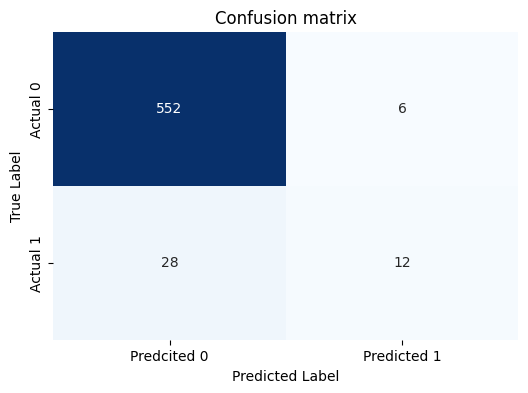

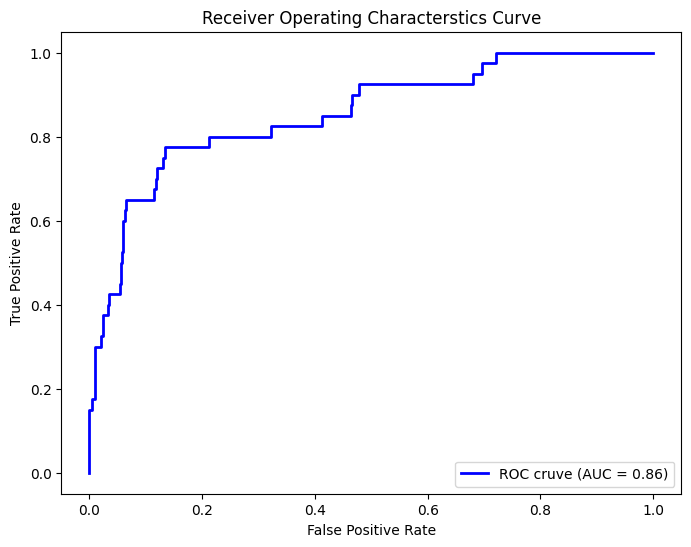

In [118]:
print(f"Best region is {best_region} witha accuracy score {best_accuracy_score:.2f}")

results = ResultsAnalyzes(region_data[best_region]['y_test'], region_data[best_region]['y_pred'])
results.show_results()
results.confusion_matrix()
results.plot_ROC_curve(region_data[best_region]['y_pred_prob'])

## 2.2 Comparing the best region with own implementation

Training completed in 149.4474 seconds.
Accuracy: 0.93, Sensivity: 0.28, Specifity: 0.98


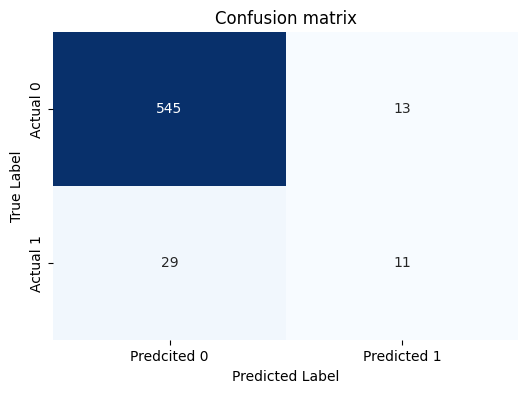

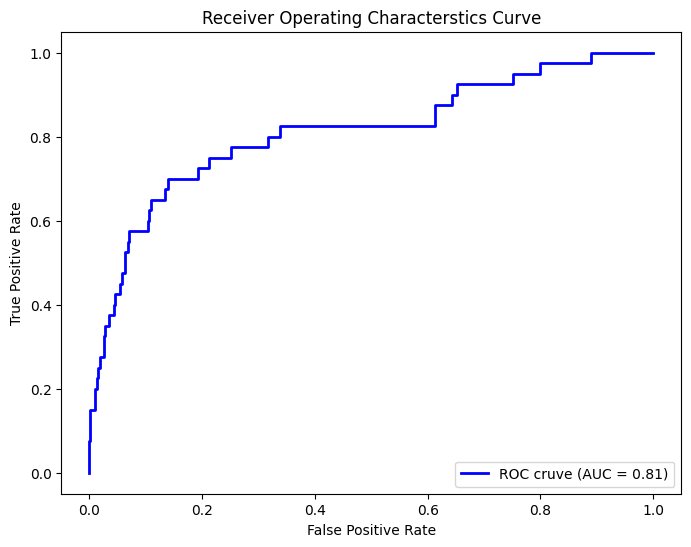

In [119]:
logistic_regression_solver = LogisticRegressionOwn()
logistic_regression_solver.fit(region_data[best_region]['X_train'], region_data[best_region]['y_train'])
y_pred = logistic_regression_solver.predict_binary_output(region_data[best_region]['X_test'])
y_pred_proba = logistic_regression_solver.predict_probability_output(region_data[best_region]['X_test'])

results_own = ResultsAnalyzes(region_data[best_region]['y_test'], y_pred)
results_own.show_results()
results_own.confusion_matrix()
results_own.plot_ROC_curve(y_pred_proba)

## 2.3 Comparing region models on country area

In [120]:
best_accuracy_score = 0
best_region = None

# Finding common features across all regions
common_features = set(region_data[regions[0]]['X_train'].columns)
for region in regions[1:]:
    common_features.intersection_update(region_data[region]['X_train'].columns)
common_features = list(common_features)

for region in regions:
    scaler = MinMaxScaler()
    region_data[region]['X_train'] = scaler.fit_transform(region_data[region]['X_train'][common_features])
    region_data[region]['X_test'] = scaler.transform(region_data[region]['X_test'][common_features])
    

X_test_coutry = np.vstack([region_data[region]['X_test'] for region in regions])
y_test_country = np.hstack([region_data[region]['y_test'] for region in regions])

for region in regions:
    
    solver = LogisticRegression(max_iter=logistic_regression_solver.iterations, tol=logistic_regression_solver.error)
    solver.fit(region_data[region]['X_train'], region_data[region]['y_train'])
    y_pred = solver.predict(X_test_coutry)
    accuracy = accuracy_score(y_pred, y_test_country)

    if accuracy > best_accuracy_score:
        best_accuracy_score = accuracy
        best_region = region

print(f"Best accuracy for country is {best_accuracy_score:.2f} based on region {best_region}")

Best accuracy for country is 0.83 based on region BadgerysCreek


### 2.3.1 Results region model on country area

Making prediction of logistic regression from sklearn took: 0.12s
Accuracy: 0.83, Sensivity: 0.36, Specifity: 0.96


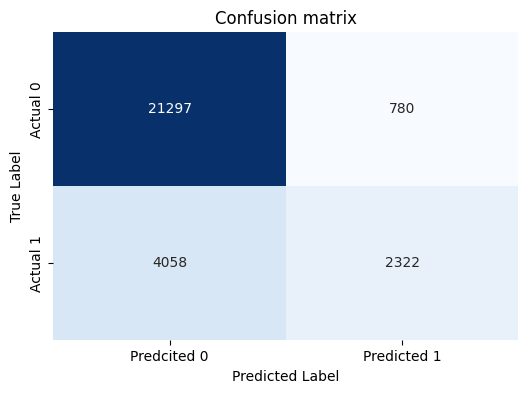

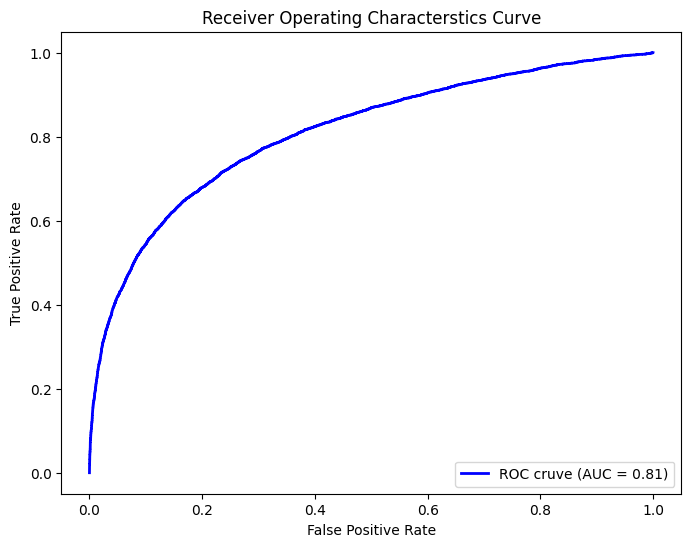

In [121]:
solver = LogisticRegression(max_iter=logistic_regression_solver.iterations, tol=logistic_regression_solver.error)
solver.fit(region_data[best_region]['X_train'], region_data[best_region]['y_train'])
# Computing time
start_time = time.time()

for _ in range(100):

    y_pred = solver.predict(X_test_coutry)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Making prediction of logistic regression from sklearn took: {elapsed_time:.2f}s")

y_pred_proba = solver.predict_proba(X_test_coutry)[:,1]

results_country = ResultsAnalyzes(y_test_country, y_pred)
results_country.show_results()
results_country.confusion_matrix()
results_country.plot_ROC_curve(y_pred_proba)

# 3. Dummy Classifier

In [122]:
from sklearn.dummy import DummyClassifier


best_accuracy_score = 0
best_region = None

for region in regions:

    # Initializing a dummy classifier
    dummy_clf = DummyClassifier()

    # Fitting model
    dummy_clf.fit(region_data[region]['X_train'], region_data[region]['y_train'])

    # Computing time
    start_time = time.time()

    for _ in range(100):

        y_pred = dummy_clf.predict(X_test_coutry)

    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Making prediction of dummy classifier from sklearn took: {elapsed_time:.2f}s")
    
    accuracy = accuracy_score(y_pred, y_test_country)

    if accuracy > best_accuracy_score:
        best_accuracy_score = accuracy
        best_region = region

print(f"Best accuracy for country is {best_accuracy_score:.2f} based on region {best_region} using dummy classifier")

Making prediction of dummy classifier from sklearn took: 0.02s
Making prediction of dummy classifier from sklearn took: 0.01s
Making prediction of dummy classifier from sklearn took: 0.01s
Making prediction of dummy classifier from sklearn took: 0.01s
Making prediction of dummy classifier from sklearn took: 0.02s
Making prediction of dummy classifier from sklearn took: 0.02s
Making prediction of dummy classifier from sklearn took: 0.01s
Making prediction of dummy classifier from sklearn took: 0.01s
Making prediction of dummy classifier from sklearn took: 0.01s
Making prediction of dummy classifier from sklearn took: 0.01s
Making prediction of dummy classifier from sklearn took: 0.01s
Making prediction of dummy classifier from sklearn took: 0.01s
Making prediction of dummy classifier from sklearn took: 0.01s
Making prediction of dummy classifier from sklearn took: 0.01s
Making prediction of dummy classifier from sklearn took: 0.01s
Making prediction of dummy classifier from sklearn took

## 3.1 Dummy classifier results

Fitting model of logistic regression using dummy classifier took: 0.02s
Accuracy: 0.78, Sensivity: 0.00, Specifity: 1.00


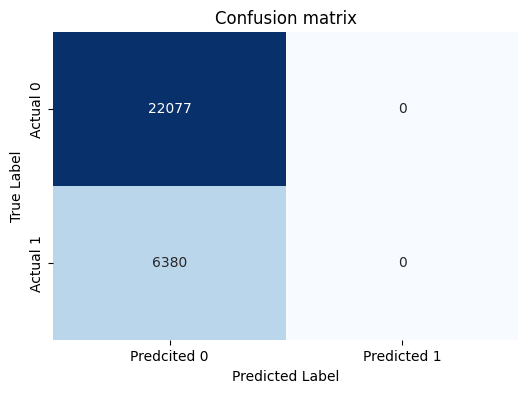

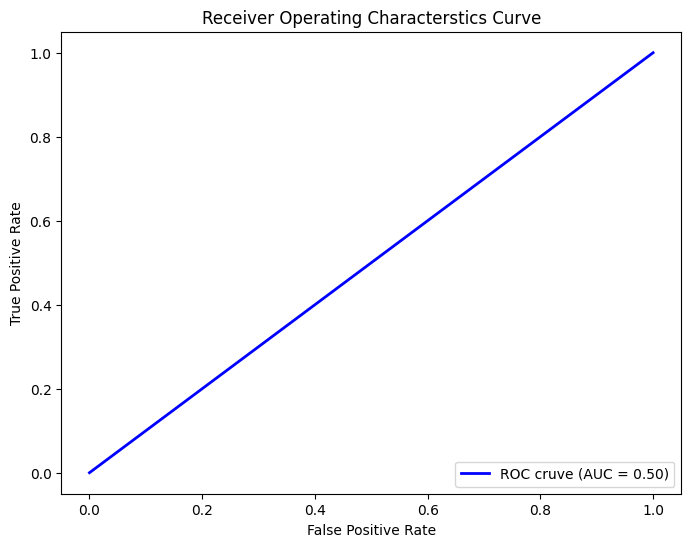

In [123]:
dummy_clf = DummyClassifier()

# Computing time
start_time = time.time()
for _ in range(100):
    dummy_clf.fit(region_data[best_region]['X_train'], region_data[best_region]['y_train'])
end_time = time.time()
elapsed_time = end_time -start_time
print(f"Fitting model of logistic regression using dummy classifier took: {elapsed_time:.2f}s")
y_pred = dummy_clf.predict(X_test_coutry)
y_pred_proba = dummy_clf.predict_proba(X_test_coutry)[:,1]

results_country = ResultsAnalyzes(y_test_country, y_pred)
results_country.show_results()
results_country.confusion_matrix()
results_country.plot_ROC_curve(y_pred_proba)